In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import tensorflow as tf
from tensorflow import keras
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVC
from sklearn.svm import SVR
from sklearn.naive_bayes import GaussianNB
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.neighbors import KNeighborsClassifier
import pickle

<html>
    <br>
</html>

In [2]:
# load the model from disk
filename = 'finalized_model.sav'
loaded_model = pickle.load(open(filename, 'rb'))

<html>
    <br>
</html>

In [3]:
# Loading the testing data
test_df=pd.read_csv("D:\IDFC Round 2\Validation Data file.csv")
test_df

,Customer_No,N_Default_L3m,Branch_Code,Max_Utilization,Max_Perc_Def_Chg_Pending,N_Family_Member,Max_Ratio_OC_Pending_POS,N_PosBkt_L3m,CoAp_Income,Ever_Default_L12M,...,Perc_Repay_Fail,Birth_Year,Max_DPD_L3m,Perc_Paymode_Cheq_Fail,Age,Total_Field_Trails,Total_Resolved,N_Enq_L9m,Max_Loan_Balance_Others,N_WorkEx_Yr
0,90000,2,22623,57,100.0,8,NaN,0.0,NaN,Yes,...,0.285714,1990,2.0,0.50,33,NaN,NaN,0,8795.0,13
1,90001,1,61114,100,100.0,6,NaN,NaN,NaN,Yes,...,0.250000,1971,14.0,0.50,52,NaN,NaN,0,13039.0,1
2,90002,2,12573,100,100.0,4,NaN,NaN,NaN,Yes,...,0.500000,1999,8.0,1.00,24,0.0,2.0,2,24599.0,-4
3,90003,0,18210,100,NaN,7,NaN,NaN,NaN,No,...,0.000000,1994,0.0,NaN,29,NaN,NaN,3,48750.0,9
4,90004,2,41174,100,100.0,1,NaN,NaN,NaN,Yes,...,0.333333,1999,19.0,0.50,24,NaN,NaN,0,55384.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30056,120056,3,50351,39,83.0,1,NaN,0.0,NaN,Yes,...,0.375000,1994,23.0,0.60,29,1.0,1.0,1,546798.0,9
30057,120057,3,54898,39,NaN,-1,NaN,0.0,NaN,Yes,...,0.333333,1980,1.0,0.50,43,NaN,NaN,0,4923.0,-6
30058,120058,3,13034,39,100.0,6,NaN,0.0,NaN,Yes,...,0.333333,1998,9.0,0.50,25,0.0,2.0,0,62908.0,5
30059,120059,0,45290,51,NaN,2,NaN,0.0,NaN,No,...,0.000000,1971,0.0,NaN,52,NaN,NaN,0,17934.0,32


<html>
    <br>
</html>

In [4]:
columns=list(test_df.columns)
columns

['Customer_No',
 'N_Default_L3m',
 'Branch_Code',
 'Max_Utilization',
 'Max_Perc_Def_Chg_Pending',
 'N_Family_Member',
 'Max_Ratio_OC_Pending_POS',
 'N_PosBkt_L3m',
 'CoAp_Income',
 'Ever_Default_L12M',
 'Perc_Paymode_Online',
 'Perc_Repay_Fail',
 'Birth_Year',
 'Max_DPD_L3m',
 'Perc_Paymode_Cheq_Fail',
 'Age',
 'Total_Field_Trails',
 'Total_Resolved',
 'N_Enq_L9m',
 'Max_Loan_Balance_Others',
 'N_WorkEx_Yr']

In [5]:
null_value_percentages=[]

In [6]:
for i in range(len(columns)):
    count=test_df[columns[i]].isnull().sum()
    null_value_percentages.append(count/len(test_df[columns[i]]))

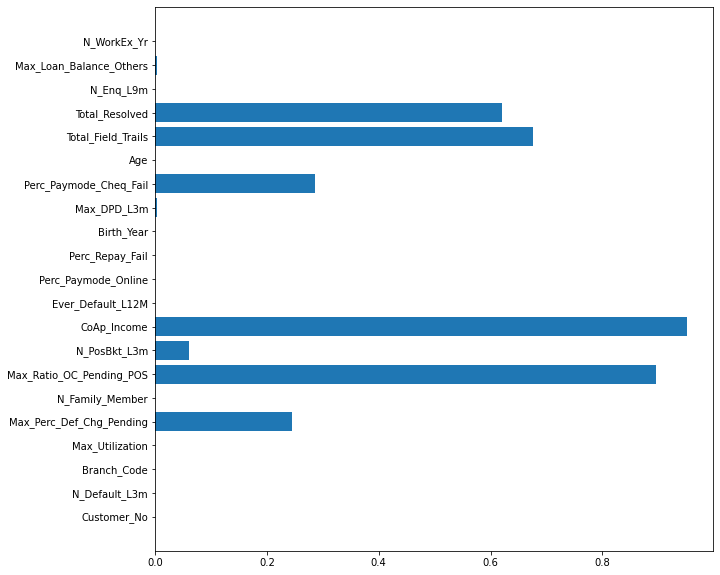

In [7]:
plt.figure(figsize=(10,10))
plt.barh(columns,null_value_percentages)
plt.show()

<html>
    <p></p>
    <h3>Remove the columns with which we have not trained the training data</h3>
    <br>
</html>

In [8]:
test_df=test_df.drop(columns=['Customer_No','Branch_Code','Max_Ratio_OC_Pending_POS','CoAp_Income','Birth_Year'])
test_df

,N_Default_L3m,Max_Utilization,Max_Perc_Def_Chg_Pending,N_Family_Member,N_PosBkt_L3m,Ever_Default_L12M,Perc_Paymode_Online,Perc_Repay_Fail,Max_DPD_L3m,Perc_Paymode_Cheq_Fail,Age,Total_Field_Trails,Total_Resolved,N_Enq_L9m,Max_Loan_Balance_Others,N_WorkEx_Yr
0,2,57,100.0,8,0.0,Yes,0.142857,0.285714,2.0,0.50,33,NaN,NaN,0,8795.0,13
1,1,100,100.0,6,NaN,Yes,0.000000,0.250000,14.0,0.50,52,NaN,NaN,0,13039.0,1
2,2,100,100.0,4,NaN,Yes,0.500000,0.500000,8.0,1.00,24,0.0,2.0,2,24599.0,-4
3,0,100,NaN,7,NaN,No,0.000000,0.000000,0.0,NaN,29,NaN,NaN,3,48750.0,9
4,2,100,100.0,1,NaN,Yes,0.333333,0.333333,19.0,0.50,24,NaN,NaN,0,55384.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30056,3,39,83.0,1,0.0,Yes,0.125000,0.375000,23.0,0.60,29,1.0,1.0,1,546798.0,9
30057,3,39,NaN,-1,0.0,Yes,0.333333,0.333333,1.0,0.50,43,NaN,NaN,0,4923.0,-6
30058,3,39,100.0,6,0.0,Yes,0.222222,0.333333,9.0,0.50,25,0.0,2.0,0,62908.0,5
30059,0,51,NaN,2,0.0,No,0.000000,0.000000,0.0,NaN,52,NaN,NaN,0,17934.0,32


<html>
    <br>
</html>

In [3]:
# As we have done for the training data, N_Family_Member column, N_WorkEx_Yr column cannot be negative, So lets make the values in those columns positive.

In [4]:
# Converting the object columns(Ever_Default_L12M) to numerical values

<html>
    <br>
</html>

In [10]:
family_members_count=test_df['N_Family_Member'].values

In [11]:
for i in range(len(family_members_count)):
    family_members_count[i]=abs(family_members_count[i])

In [12]:
test_df

,N_Default_L3m,Max_Utilization,Max_Perc_Def_Chg_Pending,N_Family_Member,N_PosBkt_L3m,Ever_Default_L12M,Perc_Paymode_Online,Perc_Repay_Fail,Max_DPD_L3m,Perc_Paymode_Cheq_Fail,Age,Total_Field_Trails,Total_Resolved,N_Enq_L9m,Max_Loan_Balance_Others,N_WorkEx_Yr
0,2,57,100.0,8,0.0,Yes,0.142857,0.285714,2.0,0.50,33,NaN,NaN,0,8795.0,13
1,1,100,100.0,6,NaN,Yes,0.000000,0.250000,14.0,0.50,52,NaN,NaN,0,13039.0,1
2,2,100,100.0,4,NaN,Yes,0.500000,0.500000,8.0,1.00,24,0.0,2.0,2,24599.0,-4
3,0,100,NaN,7,NaN,No,0.000000,0.000000,0.0,NaN,29,NaN,NaN,3,48750.0,9
4,2,100,100.0,1,NaN,Yes,0.333333,0.333333,19.0,0.50,24,NaN,NaN,0,55384.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30056,3,39,83.0,1,0.0,Yes,0.125000,0.375000,23.0,0.60,29,1.0,1.0,1,546798.0,9
30057,3,39,NaN,1,0.0,Yes,0.333333,0.333333,1.0,0.50,43,NaN,NaN,0,4923.0,-6
30058,3,39,100.0,6,0.0,Yes,0.222222,0.333333,9.0,0.50,25,0.0,2.0,0,62908.0,5
30059,0,51,NaN,2,0.0,No,0.000000,0.000000,0.0,NaN,52,NaN,NaN,0,17934.0,32


<html>
    <br>
</html>

In [13]:
work_experience_years=test_df['N_WorkEx_Yr'].values

In [14]:
for i in range(len(work_experience_years)):
    work_experience_years[i]=abs(work_experience_years[i])

In [15]:
test_df

,N_Default_L3m,Max_Utilization,Max_Perc_Def_Chg_Pending,N_Family_Member,N_PosBkt_L3m,Ever_Default_L12M,Perc_Paymode_Online,Perc_Repay_Fail,Max_DPD_L3m,Perc_Paymode_Cheq_Fail,Age,Total_Field_Trails,Total_Resolved,N_Enq_L9m,Max_Loan_Balance_Others,N_WorkEx_Yr
0,2,57,100.0,8,0.0,Yes,0.142857,0.285714,2.0,0.50,33,NaN,NaN,0,8795.0,13
1,1,100,100.0,6,NaN,Yes,0.000000,0.250000,14.0,0.50,52,NaN,NaN,0,13039.0,1
2,2,100,100.0,4,NaN,Yes,0.500000,0.500000,8.0,1.00,24,0.0,2.0,2,24599.0,4
3,0,100,NaN,7,NaN,No,0.000000,0.000000,0.0,NaN,29,NaN,NaN,3,48750.0,9
4,2,100,100.0,1,NaN,Yes,0.333333,0.333333,19.0,0.50,24,NaN,NaN,0,55384.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30056,3,39,83.0,1,0.0,Yes,0.125000,0.375000,23.0,0.60,29,1.0,1.0,1,546798.0,9
30057,3,39,NaN,1,0.0,Yes,0.333333,0.333333,1.0,0.50,43,NaN,NaN,0,4923.0,6
30058,3,39,100.0,6,0.0,Yes,0.222222,0.333333,9.0,0.50,25,0.0,2.0,0,62908.0,5
30059,0,51,NaN,2,0.0,No,0.000000,0.000000,0.0,NaN,52,NaN,NaN,0,17934.0,32


<html>
    <br>
</html>

In [16]:
encoder=LabelEncoder()

In [17]:
ever_defaulted_values=test_df['Ever_Default_L12M'].values

In [18]:
ever_defaulted_values=encoder.fit_transform(ever_defaulted_values)

In [19]:
test_df['Ever_Default_L12M']=ever_defaulted_values

In [20]:
test_df

,N_Default_L3m,Max_Utilization,Max_Perc_Def_Chg_Pending,N_Family_Member,N_PosBkt_L3m,Ever_Default_L12M,Perc_Paymode_Online,Perc_Repay_Fail,Max_DPD_L3m,Perc_Paymode_Cheq_Fail,Age,Total_Field_Trails,Total_Resolved,N_Enq_L9m,Max_Loan_Balance_Others,N_WorkEx_Yr
0,2,57,100.0,8,0.0,1,0.142857,0.285714,2.0,0.50,33,NaN,NaN,0,8795.0,13
1,1,100,100.0,6,NaN,1,0.000000,0.250000,14.0,0.50,52,NaN,NaN,0,13039.0,1
2,2,100,100.0,4,NaN,1,0.500000,0.500000,8.0,1.00,24,0.0,2.0,2,24599.0,4
3,0,100,NaN,7,NaN,0,0.000000,0.000000,0.0,NaN,29,NaN,NaN,3,48750.0,9
4,2,100,100.0,1,NaN,1,0.333333,0.333333,19.0,0.50,24,NaN,NaN,0,55384.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30056,3,39,83.0,1,0.0,1,0.125000,0.375000,23.0,0.60,29,1.0,1.0,1,546798.0,9
30057,3,39,NaN,1,0.0,1,0.333333,0.333333,1.0,0.50,43,NaN,NaN,0,4923.0,6
30058,3,39,100.0,6,0.0,1,0.222222,0.333333,9.0,0.50,25,0.0,2.0,0,62908.0,5
30059,0,51,NaN,2,0.0,0,0.000000,0.000000,0.0,NaN,52,NaN,NaN,0,17934.0,32


<html>
    <br>
</html>

In [21]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30061 entries, 0 to 30060
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   N_Default_L3m             30061 non-null  int64  
 1   Max_Utilization           30061 non-null  int64  
 2   Max_Perc_Def_Chg_Pending  22692 non-null  float64
 3   N_Family_Member           30061 non-null  int64  
 4   N_PosBkt_L3m              28210 non-null  float64
 5   Ever_Default_L12M         30061 non-null  int32  
 6   Perc_Paymode_Online       30061 non-null  float64
 7   Perc_Repay_Fail           30061 non-null  float64
 8   Max_DPD_L3m               29943 non-null  float64
 9   Perc_Paymode_Cheq_Fail    21452 non-null  float64
 10  Age                       30061 non-null  int64  
 11  Total_Field_Trails        9734 non-null   float64
 12  Total_Resolved            11388 non-null  float64
 13  N_Enq_L9m                 30061 non-null  int64  
 14  Max_Lo

<html>
    <p></p>
    <h3>Filling the null values in the testing data </h3>
    <br>
</html>

In [22]:
x_test=test_df.values
x_test

array([[2.00000e+00, 5.70000e+01, 1.00000e+02, ..., 0.00000e+00,
        8.79500e+03, 1.30000e+01],
       [1.00000e+00, 1.00000e+02, 1.00000e+02, ..., 0.00000e+00,
        1.30390e+04, 1.00000e+00],
       [2.00000e+00, 1.00000e+02, 1.00000e+02, ..., 2.00000e+00,
        2.45990e+04, 4.00000e+00],
       ...,
       [3.00000e+00, 3.90000e+01, 1.00000e+02, ..., 0.00000e+00,
        6.29080e+04, 5.00000e+00],
       [0.00000e+00, 5.10000e+01,         nan, ..., 0.00000e+00,
        1.79340e+04, 3.20000e+01],
       [3.00000e+00, 6.40000e+01, 1.00000e+02, ..., 0.00000e+00,
        1.98011e+05, 3.00000e+00]])

In [23]:
x_test[1]

array([1.0000e+00, 1.0000e+02, 1.0000e+02, 6.0000e+00,        nan,
       1.0000e+00, 0.0000e+00, 2.5000e-01, 1.4000e+01, 5.0000e-01,
       5.2000e+01,        nan,        nan, 0.0000e+00, 1.3039e+04,
       1.0000e+00])

<html>
    <br>
</html>

In [24]:
30061**0.5

173.38108316653233

In [25]:
imputer=KNNImputer(n_neighbors=173)

In [26]:
x_test=imputer.fit_transform(x_test)

In [27]:
x_test[1]

array([1.00000000e+00, 1.00000000e+02, 1.00000000e+02, 6.00000000e+00,
       0.00000000e+00, 1.00000000e+00, 0.00000000e+00, 2.50000000e-01,
       1.40000000e+01, 5.00000000e-01, 5.20000000e+01, 4.16184971e-01,
       1.38728324e+00, 0.00000000e+00, 1.30390000e+04, 1.00000000e+00])

<html>
    <p></p>
    <h3>Predicting the probability of occurrence test sample in each class</h3>
    <br>
</html>

In [28]:
probability_of_each_class=loaded_model.predict_proba(x_test)
probability_of_each_class

array([[0.76, 0.24],
       [0.84, 0.16],
       [0.95, 0.05],
       ...,
       [0.97, 0.03],
       [0.9 , 0.1 ],
       [0.74, 0.26]])

<html>
    <p></p>
    <h3>Predicting the results of testing data</h3>
    <br>
</html>

In [29]:
y_pred=loaded_model.predict(x_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [30]:
np.unique(y_pred,return_counts=True)

(array([0, 1], dtype=int64), array([26550,  3511], dtype=int64))

<html>
    <br>
</html>

In [82]:
predicted_probability=[]

In [83]:
for i in range(len(y_pred)):
    predicted_probability.append(probability_of_each_class[i][1])

In [84]:
predicted_probability=np.array(predicted_probability)
predicted_probability

array([0.24, 0.16, 0.05, ..., 0.03, 0.1 , 0.26])

<html>
    <br>
</html>

In [52]:
Customer_No=[i for i in range(90000,120061)]

In [66]:
df=pd.DataFrame(Customer_No,columns=['Customer_No'])
df

,Customer_No
0,90000
1,90001
2,90002
3,90003
4,90004
...,...
30056,120056
30057,120057
30058,120058
30059,120059


In [85]:
df['Prediction']=y_pred

In [86]:
df['Probability_Prediction']=predicted_probability

<html>
    <br>
</html>

In [87]:
df

,Customer_No,Prediction,Probability_Prediction
0,90000,0,0.24
1,90001,0,0.16
2,90002,0,0.05
3,90003,0,0.30
4,90004,0,0.44
...,...,...,...
30056,120056,0,0.19
30057,120057,0,0.15
30058,120058,0,0.03
30059,120059,0,0.10


In [89]:
df.to_csv('D:\IDFC Round 2\jagadeesh_kumar_nitrourkela.csv',index=False)